In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        dataset=pd.read_csv(os.path.join(dirname, filename),header=0)
dataset.describe()
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [35]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

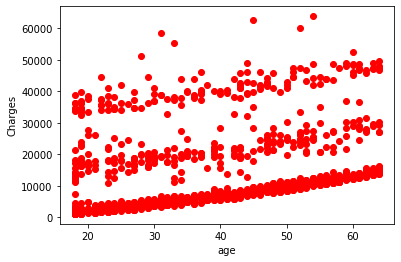

In [36]:
#checking do age and charges have any linear relation
import matplotlib.pyplot as plt
plt.scatter(X[:,0:1], y, color = 'red')
plt.xlabel('age')
plt.ylabel('Charges')
plt.show()

In [37]:
#Any missing values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [38]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#print(X[0:4,:])
ct = ColumnTransformer(transformers=[('encodersex', OneHotEncoder(), [1]),
                                    ('encodersmoker', OneHotEncoder(), [4]),
                                    ('encoderregion', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
#print(X[0:4,:])

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 [33 'male' 22.705 0 'no' 'northwest']]
[[1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 19 27.9 0]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 18 33.77 1]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 28 33.0 3]
 [0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 33 22.705 0]]


In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [40]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 4383.68  1646.43]
 [12885.04 11353.23]
 [12589.22  8798.59]
 [13286.23 10381.48]
 [  544.73  2103.08]
 [32117.58 38746.36]
 [12919.04  9304.7 ]
 [12318.62 11658.12]
 [ 3784.29  3070.81]
 [29468.46 19539.24]
 [11002.81 12629.9 ]
 [17539.69 11538.42]
 [ 8681.35  6338.08]
 [ 8349.04  7050.64]
 [ 3130.13  1137.47]
 [10445.84  8968.33]
 [ 3863.74 21984.47]
 [ 6944.63  6414.18]
 [15009.63 28287.9 ]
 [14441.6  13462.52]
 [12543.66  9722.77]
 [32958.73 40932.43]
 [ 9072.64  8026.67]
 [ 8986.86  8444.47]
 [ 3022.86  2203.47]
 [ 8164.97  6664.69]
 [ 9556.08  8606.22]
 [10743.2   8283.68]
 [ 7694.02  5375.04]
 [ 4373.44  3645.09]
 [14140.94 11674.13]
 [ 5811.79 11737.85]
 [34631.91 24873.38]
 [27009.11 33750.29]
 [33348.14 24180.93]
 [ 9532.97  9863.47]
 [30421.65 36837.47]
 [26648.91 17942.11]
 [15157.78 11856.41]
 [33895.76 39725.52]
 [ 6303.39  4349.46]
 [14059.15 11743.93]
 [10713.45 19749.38]
 [15089.36 12347.17]
 [ 4187.95  4931.65]
 [13106.43 30260.  ]
 [ 4336.2  27724.29]
 [28607.06 34

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7623311844057113